### Choosing best value of K in KNeighborsClassifier

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,auc,roc_curve,roc_auc_score,precision_recall_curve

In [3]:
df=pd.read_csv('heart_v2.csv')
df.head(2)

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0


In [4]:
df.columns=['age','sex','bp','cholestrol','target']

In [5]:
df['target'].value_counts()

0    150
1    120
Name: target, dtype: int64

In [6]:
df.isnull().sum()

age           0
sex           0
bp            0
cholestrol    0
target        0
dtype: int64

In [7]:
import warnings
warnings.filterwarnings('ignore')

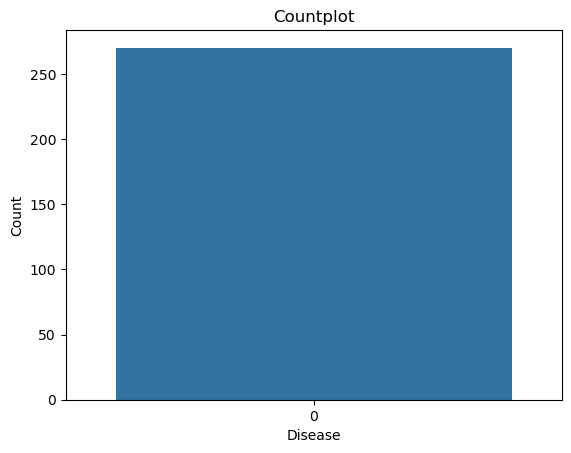

In [8]:
sns.countplot(df['target'])
plt.title('Countplot')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()

In [9]:
df.dtypes

age           int64
sex           int64
bp            int64
cholestrol    int64
target        int64
dtype: object

In [10]:
X=df.drop(['target'],axis=1)
y=df['target']

In [11]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [12]:
X=ss.fit_transform(X)

In [13]:
X[0:2]

array([[ 1.71209356,  0.6894997 , -0.07540984,  1.40221232],
       [ 1.38213977, -1.45032695, -0.91675934,  6.0930045 ]])

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=3)

In [15]:
# choosing best value of k, based on test score

train_score=[]
test_score=[]
k_values=[]

In [16]:
for k in range(1,21):
    k_values.append(k)
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

In [17]:
max_test_score=max(test_score)
max_test_score

0.6911764705882353

In [18]:
df2=pd.DataFrame({'k_values':k_values,'test_score':test_score})

In [19]:
df2

,k_values,test_score
0,1,0.573529
1,2,0.676471
2,3,0.647059
3,4,0.691176
4,5,0.602941
5,6,0.632353
6,7,0.573529
7,8,0.602941
8,9,0.573529
9,10,0.544118


In [20]:
# f1_score

from sklearn.metrics import f1_score

When and why do we need f1-score?
When precision and recall both are equally important for us.
since f1-score is the harmonic mean of precisin and recall
High recall=high TPR
HIGH Precision= high..??